##Task1

In [ ]:
def MCP_Neurons_AND(X1, X2, T):
    """
    This function implements a basic AND operation using an MCP Neuron for two inputs.

    Arguments:
    X1 (list): An array of binary values.
    X2 (list): An array of binary values.
    T (int): Threshold value.

    Output:
    state_neuron (list): A list representing the neuron state (1 or 0) for the given inputs.
    """
    assert len(X1) == len(X2), "Input lists must have the same length"

    state_neuron = []

    for x1, x2 in zip(X1, X2):
        if (x1 + x2) >= T:
            state_neuron.append(1)
        else:
            state_neuron.append(0)

    return state_neuron

# Example usage for MCP_Neurons_AND function
X1 = [0, 0, 1, 1]
X2 = [0, 1, 0, 1]
T = 2  # Threshold value

result = MCP_Neurons_AND(X1, X2, T)
print(f"Output of AND gate for inputs {X1} and {X2} with threshold {T}: {result}")


Output of AND gate for inputs [0, 0, 1, 1] and [0, 1, 0, 1] with threshold 2: [0, 0, 0, 1]


In [ ]:
def MCP_Neurons_OR(X1, X2, T):
    """
    This function implements basic OR operations with MCP Neuron for two inputs.
    Arguments:
    X1 (1D array): An array of binary values.
    X2 (1D array): An array of binary values.
    T (int): Threshold value.
    Returns:
    state_neuron (1D list): The state of the neuron (1 or 0) for the particular inputs.
    """
    assert len(X1) == len(X2)
    state_neuron =[]

    for x1, x2 in zip(X1, X2):
        if (x1 + x2) >= T:
            state_neuron.append(1)
        else:
            state_neuron.append(0)

    return state_neuron

# Example usage for MCP_Neurons_OR function
T = 1 # Threshold value for OR gate
result_or = MCP_Neurons_OR(X1, X2, T)
print(f"Output of OR gate for inputs {X1} and {X2} with threshold {T}: {result_or}")


Output of OR gate for inputs [0, 0, 1, 1] and [0, 1, 0, 1] with threshold 1: [0, 1, 1, 1]


##Answer the following question

1. List out all the limitations of MCP -Neurons.

= MCP nreurons only work with linearly separable functions like AND and OR fail with XOR.

= It has fixed threshold values, which limits its ability to learn dynamically.

= Cannot handle complex problem requiring multi-layer processing.

= No learning capability, as weights are not adjusted automatically.


2. Think if you can develop logic to solve for XOR function using MCP neuron.

= XOR function cannot be directly implemented using a single-layer MCP neuron as it is linearly separable.

= However, we can use a combination of MCP neurons to form an XOR gate.

= Use AND, OR, and NAND (NOT AND) gates to create an XOR function:

= XOR =(X1 OR X2) AND (NOT(X1 AND X2))

Index(['label', 'pixel_0', 'pixel_1', 'pixel_2', 'pixel_3', 'pixel_4',
       'pixel_5', 'pixel_6', 'pixel_7', 'pixel_8',
       ...
       'pixel_774', 'pixel_775', 'pixel_776', 'pixel_777', 'pixel_778',
       'pixel_779', 'pixel_780', 'pixel_781', 'pixel_782', 'pixel_783'],
      dtype='object', length=785)
Feature matrix shape:  (12665, 784)
Label vector shape:  (12665,)


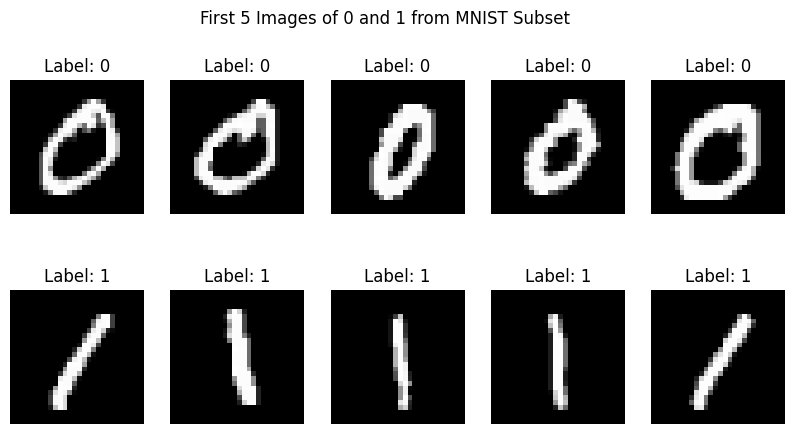

The Final Accuracy is: 1.0
All images were correctly classified!


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df_0_1 = pd.read_csv("/content/drive/MyDrive/mnist_0_and_1.csv")

# Check column names
print(df_0_1.columns)  # Debugging step

# Fix column name if it's "label" instead of "lable"
X = df_0_1.drop(columns=["label"]).values  # Correct column name
Y = df_0_1["label"].values  # Correct column name

# Print shapes
print("Feature matrix shape: ", X.shape)
print("Label vector shape: ", Y.shape)  # Fixed from `y.shape`

# Visualize some images
images_0 = X[Y == 0]
images_1 = X[Y == 1]

fig, axes = plt.subplots(2, 5, figsize=(10, 5))
for i in range(5):
    axes[0, i].imshow(images_0[i].reshape(28, 28), cmap="gray")
    axes[0, i].set_title("Label: 0")
    axes[0, i].axis("off")

    axes[1, i].imshow(images_1[i].reshape(28, 28), cmap="gray")
    axes[1, i].set_title("Label: 1")
    axes[1, i].axis("off")
plt.suptitle("First 5 Images of 0 and 1 from MNIST Subset")
plt.show()

# Initialize weights and bias
weights = np.zeros(X.shape[1])  # 784 weights (one for each pixel)
bias = 0
learning_rate = 0.1
epochs = 100

# Decision function
def decision_function(X, weights, bias):
    predictions = np.dot(X, weights) + bias
    return np.where(predictions >= 0, 1, 0)  # Step function

# Train Perceptron
def train_perceptron(X, y, weights, bias, learning_rate=0.1, epochs=100):
    for epoch in range(epochs):
        for i in range(len(y)):
            output = np.dot(X[i], weights) + bias
            prediction = 1 if output >= 0 else 0
            error = y[i] - prediction

            # Update rule
            weights += learning_rate * error * X[i]
            bias += learning_rate * error

    # Compute accuracy
    y_pred = decision_function(X, weights, bias)
    accuracy = np.mean(y_pred == y)
    return weights, bias, accuracy

# Train perceptron
weights, bias, accuracy = train_perceptron(X, Y, weights, bias)
print("The Final Accuracy is:", accuracy)

# Visualize misclassified images
predictions = np.dot(X, weights) + bias
y_pred = np.where(predictions >= 0, 1, 0)
misclassified_idx = np.where(y_pred != Y)[0]

if len(misclassified_idx) > 0:
    fig, axes = plt.subplots(2, 5, figsize=(10, 5))
    for ax, idx in zip(axes.flat, misclassified_idx[:10]):
        ax.imshow(X[idx].reshape(28, 28), cmap="gray")
        ax.set_title(f"Pred: {_pred[idx]}, True: {y[idx]}")
        ax.axis("off")
    plt.suptitle("Misclassified Images")
    plt.show()
else:
    print("All images were correctly classified!")



##Task3

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df_3_5 = pd.read_csv("/content/drive/MyDrive/mnist_3_and_5.csv")

X =df_3_5.drop(columns=["label"]).values
y = df_3_5["label"].values

y = np.where(y == 3, 0, 1)

print("Feature matrix shape:", X.shape)
print("Lable vector shape:", y.shape)


Feature matrix shape: (2741, 784)
Lable vector shape: (2741,)


##Visualize Sample Images

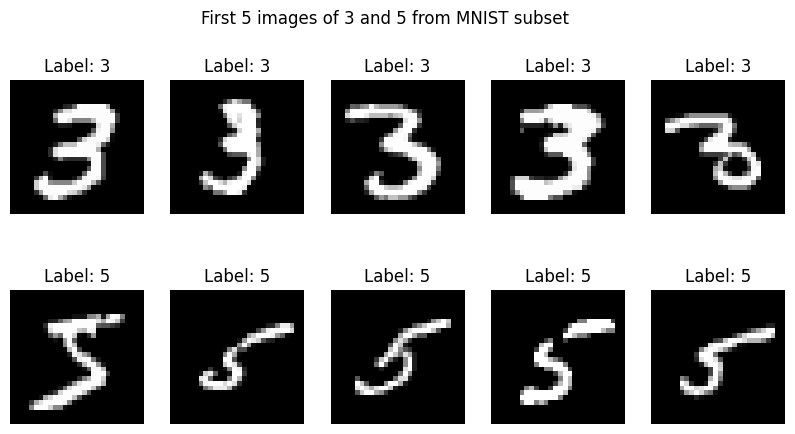

In [ ]:
y = df_3_5["label"].values
y= np.where(y == 3, 0, 1)

images_3 =X[y == 0]
images_5 =X[y == 1]

fig, axes =plt.subplots(2,5, figsize= (10, 5))
for i in range(5):
 axes[0, i].imshow(images_3[i].reshape(28, 28), cmap="gray")
 axes[0, i].set_title("Label: 3")
 axes[0, i].axis("off")

 axes[1, i].imshow(images_5[i].reshape(28, 28), cmap="gray")
 axes[1, i].set_title("Label: 5")
 axes[1, i].axis("off")

plt.suptitle("First 5 images of 3 and 5 from MNIST subset")
plt.show()


##Initialize Weights and Bias

In [ ]:
weights = np.zeros(X.shape[1])
bias = 0
learning_rate = 0.1
epochs = 100

##Implement decision function

In [ ]:
def decision_function(X, weights, bias):
  predictions = np.dot(X, weights) + bias
  return np.where(predictions >= 0, 1, 0)

##Implement Perception Training algorithm

In [ ]:
def train_perception(X, y, weights, bias, learning_rate= 0.1, epochs = 100):
  for epoch in range (epochs):
    for i in range(len(X)):
      prediction = np.dot(X[i], weights) + bias
      y_pred = 1 if prediction >= 0 else 0

      error =y[i] - y_pred
      weights += learning_rate * error *X[i]
      bias += learning_rate * error

  return weights, bias

##Train the perceptron

In [ ]:
weights, bias, accuracy = train_perceptron(X, y, weights, bias)
print("Final accuracy:", accuracy)

Final accuracy: 1.0


##Evaluate model performance

In [ ]:
y_pred = decision_function(X, weights, bias)

accuracy = np.mean(y_pred == y)
print(f"final accuracy:{accuracy: .4f}")

final accuracy: 1.0000


##Visualize Misclassified Images

In [ ]:
misclassified_idx = np.where (y_pred != y)[0]
if len(misclassified_idx) > 0:
  fig, axes = plt.subplots(2, 5, figsize=(10,5))
  for ax, idx in zip(axes.flat, misclassified_idx[:10]):
    ax.imshow(X[idx].reshape(28, 28), cmap="gray")
    ax.set_title(f"Pred: {y_pred[idx]}, True: {y[idx]}")
    ax.axis("off")
    plt.suptitle("Misclassified Images")
    plt.show()
else:
  print("All images were correctly classified!")



All images were correctly classified!
